In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,KBinsDiscretizer,OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv('/content/sample_data/Churn_Modelling.csv')

In [4]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2067,2068,15767794,Browne,744,France,Male,31,9,120718.28,1,1,1,58961.49,0
1169,1170,15650351,Millar,653,France,Female,38,8,102133.38,1,1,1,166520.96,0
8306,8307,15777060,Olszewski,770,France,Female,33,4,0.00,1,1,0,26080.54,1
6143,6144,15654096,Johnston,779,Germany,Female,24,10,122200.31,2,1,0,43705.56,0
5384,5385,15679813,Ellis,727,Spain,Male,28,1,0.00,1,1,0,40357.39,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


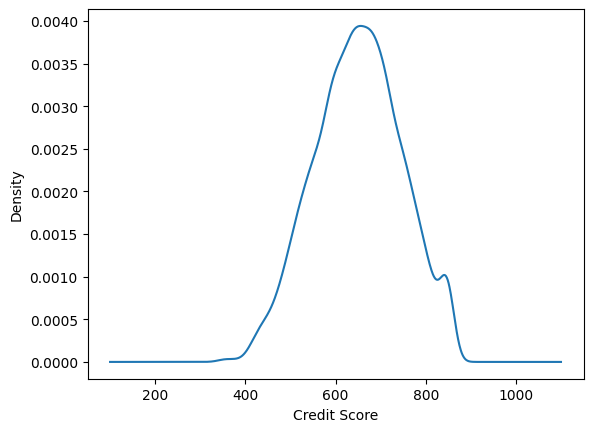

In [6]:
df['CreditScore'].plot(kind='kde')
plt.xlabel('Credit Score')
plt.show()

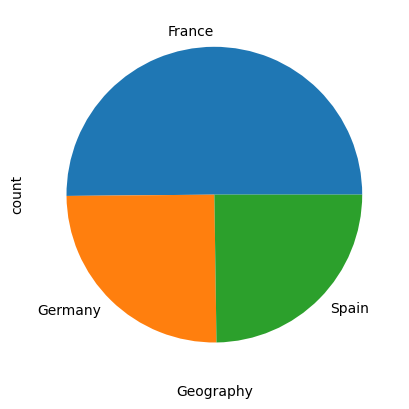

In [7]:
df['Geography'].value_counts().plot(kind='pie')
plt.xlabel('Geography')
plt.show()

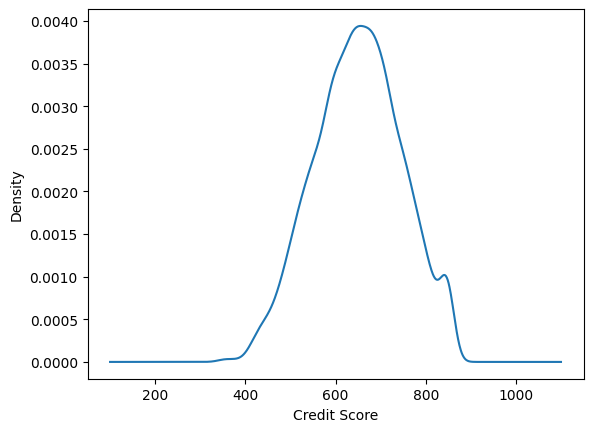

In [8]:
df['CreditScore'].plot(kind='kde')
plt.xlabel('Credit Score')
plt.show()

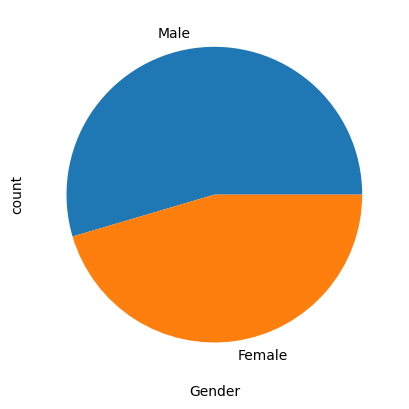

In [9]:
df['Gender'].value_counts().plot(kind='pie')
plt.xlabel('Gender')
plt.show()

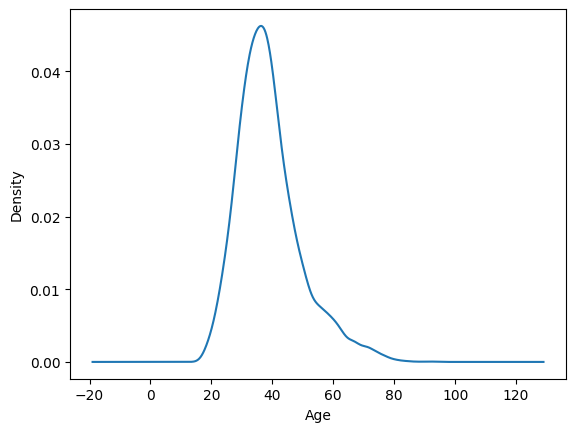

In [10]:
df['Age'].plot(kind='kde')
plt.xlabel('Age')
plt.show()

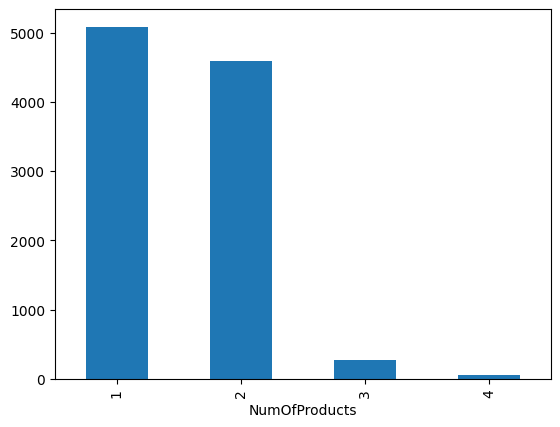

In [11]:
df['NumOfProducts'].value_counts().plot(kind='bar')
plt.show()

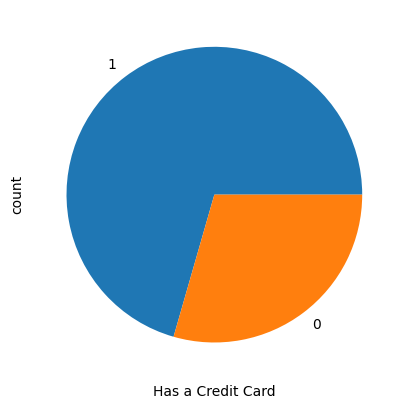

In [12]:
df['HasCrCard'].value_counts().plot(kind='pie')
plt.xlabel('Has a Credit Card')
plt.show()

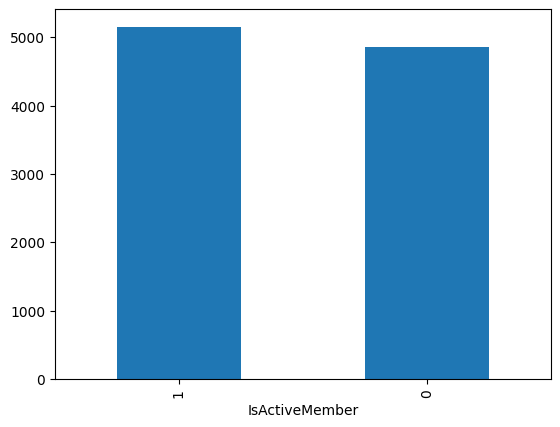

In [13]:
df['IsActiveMember'].value_counts().plot(kind='bar')
plt.show()

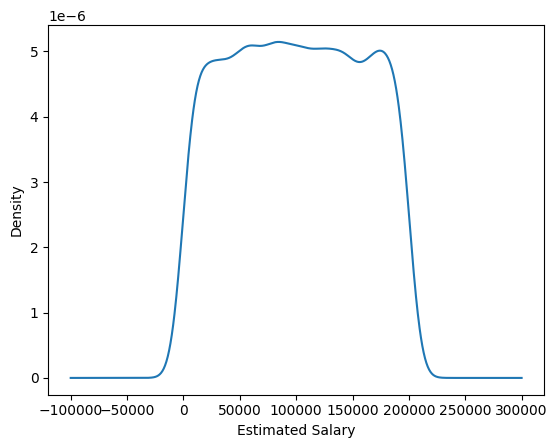

In [14]:
df['EstimatedSalary'].plot(kind='kde')
plt.xlabel('Estimated Salary')
plt.show()

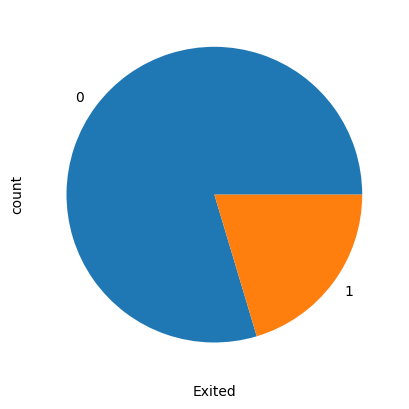

In [15]:
df['Exited'].value_counts().plot(kind='pie')
plt.xlabel('Exited')
plt.show()

In [17]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [19]:
corr_heatmap=df.drop(['Surname','Geography','Gender'],axis=1)
corr_heatmap.corr().style.background_gradient(cmap="YlGnBu")

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


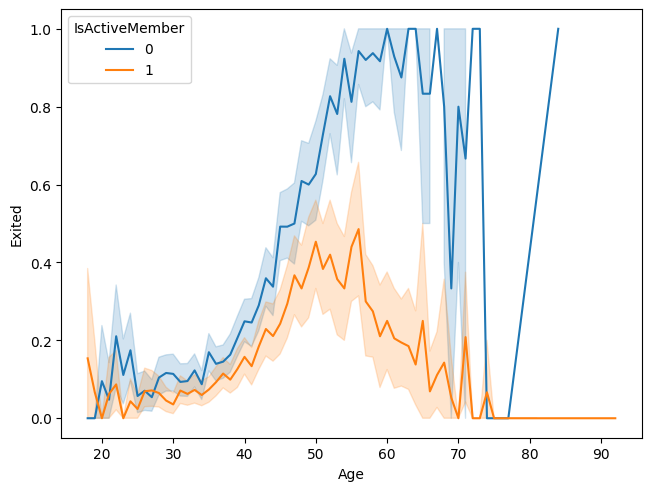

In [20]:
fig = plt.figure(layout='compressed')
sns.lineplot(x='Age',y='Exited',data=df,hue='IsActiveMember')
plt.show()

In [21]:
df['dummy_age']=df[df['Age'].between(38,55)]['Age']

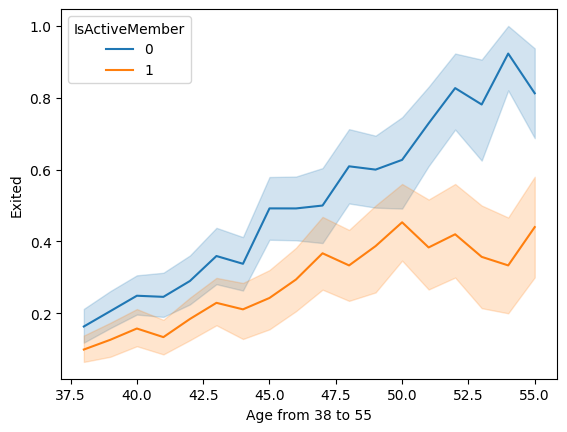

In [22]:
sns.lineplot(x='dummy_age',y='Exited',data=df,hue='IsActiveMember')
plt.xlabel('Age from 38 to 55')
plt.show()

In [23]:
df['dummy_age']=df[df['Age'].between(55,75)]['Age']

In [24]:
df['dummy_age']=df[df['Age'].between(55,75)]['Age']

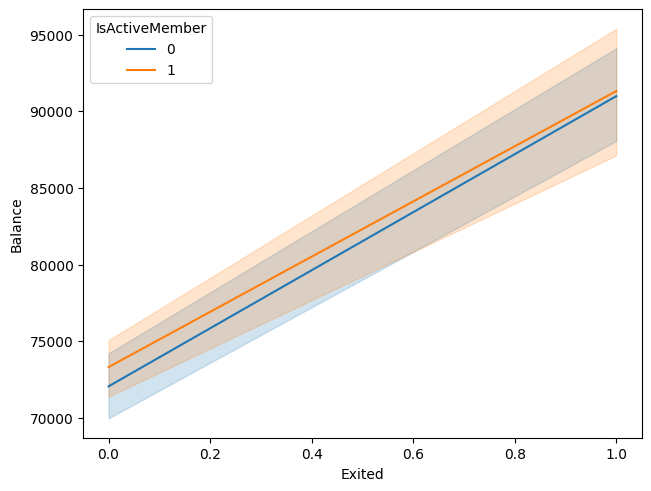

In [25]:
fig = plt.figure(layout='compressed')
sns.lineplot(x='Exited',y='Balance',data=df,hue='IsActiveMember')
plt.show()

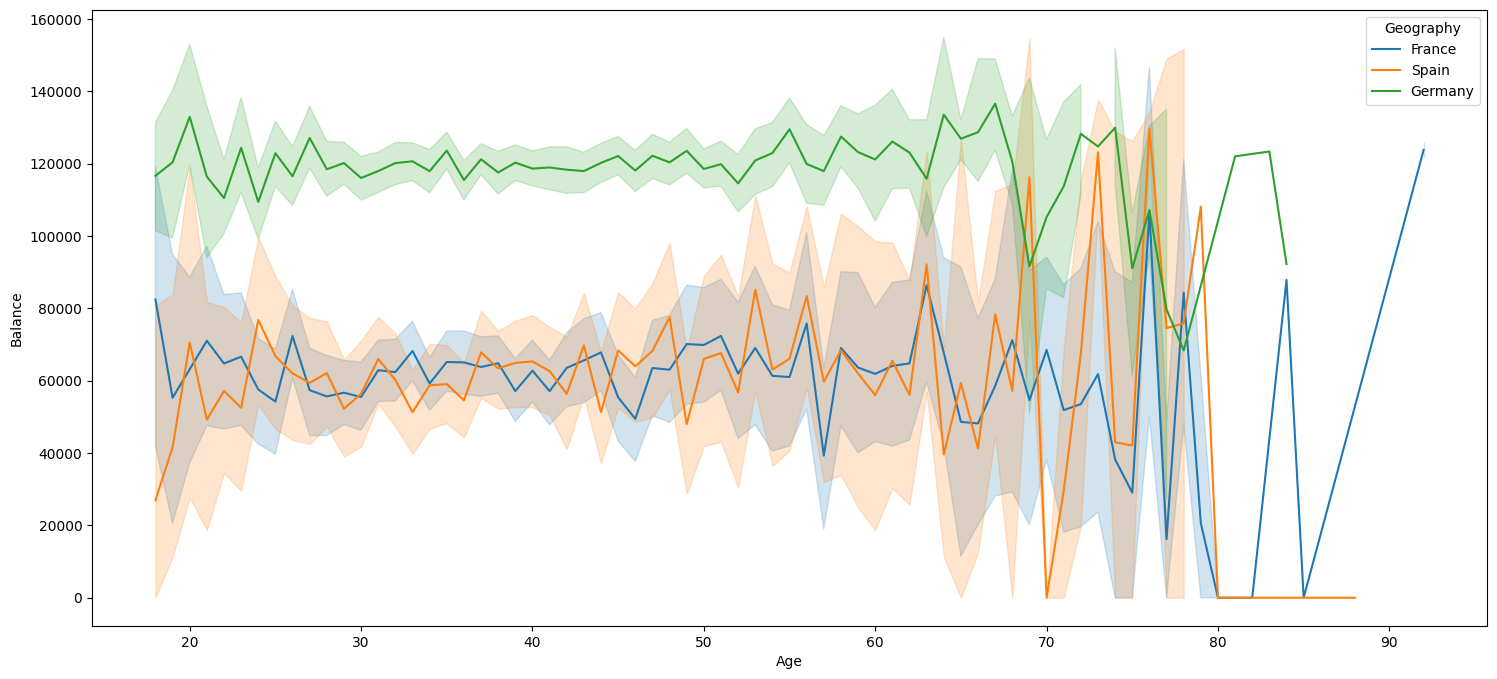

In [26]:
fig = plt.figure(figsize=(18,8))
sns.lineplot(x='Age',y='Balance',data=df,hue='Geography')
plt.show()

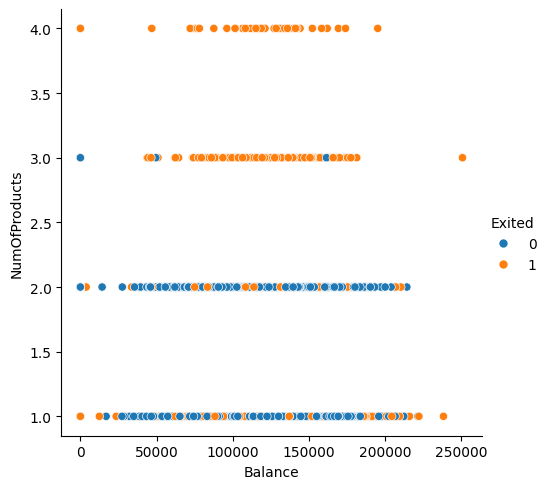

In [27]:
sns.relplot(x='Balance',y='NumOfProducts',data=df,hue='Exited')
plt.show()

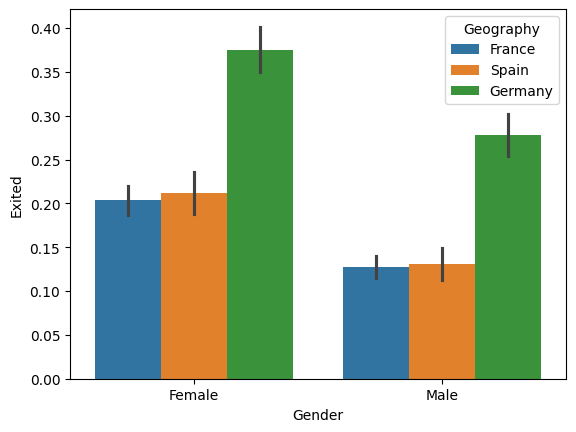

In [28]:
sns.barplot(x='Gender',y='Exited',data=df,hue='Geography')
plt.show()

In [29]:
print('Surname column got',len(df['Surname'].value_counts()),'unique values therefore, it needs to be removed.')

Surname column got 2932 unique values therefore, it needs to be removed.


In [30]:
df=df.drop(['RowNumber','CustomerId','Surname','dummy_age'],axis=1)

In [31]:
x=df.drop('Exited',axis=1)
y=df['Exited']

In [32]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [33]:
x_train.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8371,813,Germany,Female,29,5,106059.4,1,0,0,187976.88


In [34]:
coltran_101 = ColumnTransformer(transformers=[
    ('tnf101',KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile'),[3])],
remainder='passthrough')

coltran_102 = ColumnTransformer(transformers=[
     ('tnf201',StandardScaler(),[1,5,9])],
remainder='passthrough')

coltran_103 = ColumnTransformer(transformers=[
     ('tnf301',OneHotEncoder(drop='first',dtype='int32'),[4,5])],
remainder='passthrough')

coltran_104 = ColumnTransformer(transformers=[
     ('tnf401',PCA(n_components=.90),[])],
remainder='passthrough')

coltran_105 = RandomForestClassifier(max_depth=2, random_state=0)

In [35]:
pipe101=Pipeline([('KbinDis',coltran_101),('StdScaler',coltran_102),('OHE',coltran_103),('PCA',coltran_104)])
x_train=pipe101.fit_transform(x_train)
x_test=pipe101.fit_transform(x_test)

In [36]:
pipe102=Pipeline([('KNN',coltran_105)])

In [37]:
pipe101

Pipeline(steps=[('KbinDis',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf101',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=4),
                                                  [3])])),
                ('StdScaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf201', StandardScaler(),
                                                  [1, 5, 9])])),
                ('OHE',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf301',
                                                  OneHotEncoder(drop='first',
                                                                dtype='int32'),
                                                  [4, 5])])),
                ('PCA',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf401',
                                                  PCA(n_components=0.9),
                                                  [])]))])

In [38]:
pipe102

Pipeline(steps=[('KNN', RandomForestClassifier(max_depth=2, random_state=0))])

In [39]:
pipe102.fit(x_train,y_train)

Pipeline(steps=[('KNN', RandomForestClassifier(max_depth=2, random_state=0))])

In [40]:
y_pred=pipe102.predict(x_test)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2657
           1       1.00      0.07      0.13       643

    accuracy                           0.82      3300
   macro avg       0.91      0.53      0.51      3300
weighted avg       0.85      0.82      0.75      3300

